In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore","use_inf_as_na")
iris = sns.load_dataset("iris")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [13]:
#First we will create extra groups for pi chart
iris["Sepal_length_class"]= pd.cut(iris.sepal_length, bins=[0,5,6.5,10],labels=["Small","Medium","Long"])
iris["Sepal_width_class"]= pd.cut(iris.sepal_width, bins=[0,2.7,3.4,10],labels=["thin","Normal","thick"])
#print(iris)
#for more extra values wwe will do creation of crosstabulation
iris_1_tab = pd.crosstab(iris["Sepal_length_class"],iris["Sepal_width_class"])
#print(iris_1_tab)
iris_2_tab = iris_1_tab.transpose()
#print(iris_2_tab)
iris_1_tab["All_Flower"] = iris_1_tab[iris_1_tab.columns].sum(axis=1)
iris_2_tab["All_Flower"] = iris_2_tab[iris_2_tab.columns].sum(axis=1)
print(iris_1_tab)
print(iris_2_tab)

Sepal_width_class   thin  Normal  thick  All_Flower
Sepal_length_class                                 
Small                  5      22      5          32
Medium                26      45     17          88
Long                   2      25      3          30
Sepal_length_class  Small  Medium  Long  All_Flower
Sepal_width_class                                  
thin                    5      26     2          33
Normal                 22      45    25          92
thick                   5      17     3          25


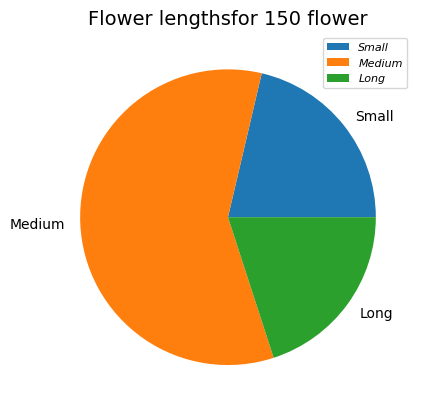

In [14]:
from matplotlib.font_manager import FontProperties
fp = FontProperties(style="italic",size=8)
ax = iris_1_tab.plot.pie(y="All_Flower")
ax.set_title("Flower lengthsfor 150 flower",fontsize = 14)
ax.set_ylabel("")
plt.legend(prop=fp)
plt.show()

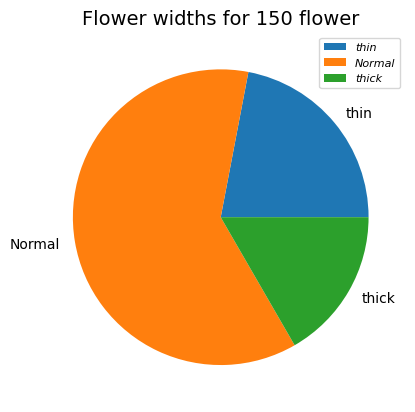

In [15]:
ax = iris_2_tab.plot.pie(y="All_Flower")
ax.set_title("Flower widths for 150 flower",fontsize = 14)
ax.set_ylabel("")
plt.legend(prop=fp)
plt.show()

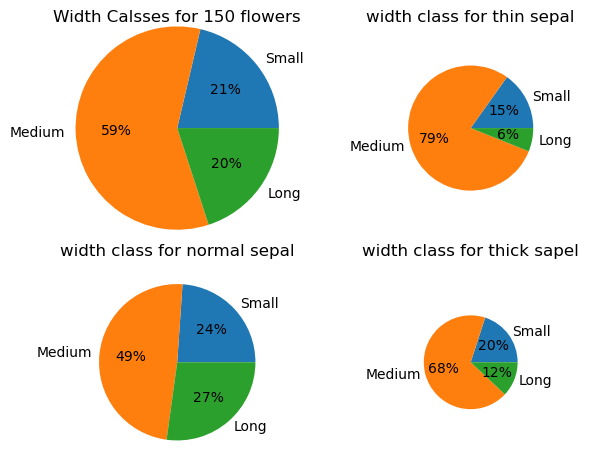

In [21]:
fig, ((pie1,pie2),(pie3,pie4)) = plt.subplots(2,2)
iris_1_tab.plot.pie(y="All_Flower",legend=False,ylabel = "",title="Width Calsses for 150 flowers",autopct = '%.0f%%',radius = 1.3,ax = pie1)
iris_1_tab.plot.pie(y="thin",legend=False,ylabel = "",title="width class for thin sepal",autopct = '%.0f%%',radius = 0.8,ax = pie2)
iris_1_tab.plot.pie(y="Normal",legend=False,ylabel = "",title="width class for normal sepal",autopct = '%.0f%%',radius = 1,ax = pie3)
iris_1_tab.plot.pie(y="thick",legend=False,ylabel = "",title="width class for thick sapel",autopct = '%.0f%%',radius = 0.6,ax = pie4)
#fig.legend(["Small","Medium","Long"],loc="lower rigth")
fig.tight_layout()
plt.show()

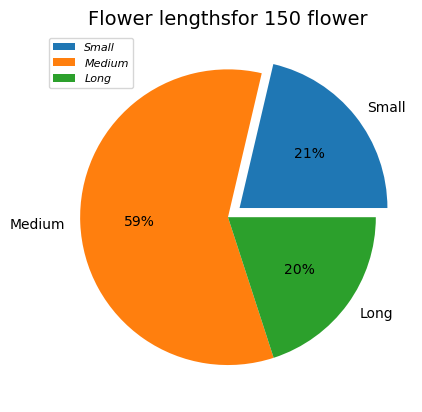

In [27]:
explode_dist = (0.10,0,0)
#this used to take out some particular slice or more then one slice
ax = iris_1_tab.plot.pie(y="All_Flower", autopct = "%.0f%%",explode = explode_dist)
ax.set_title("Flower lengthsfor 150 flower",fontsize = 14)
ax.set_ylabel("")
ax.legend(prop=fp)
plt.show()

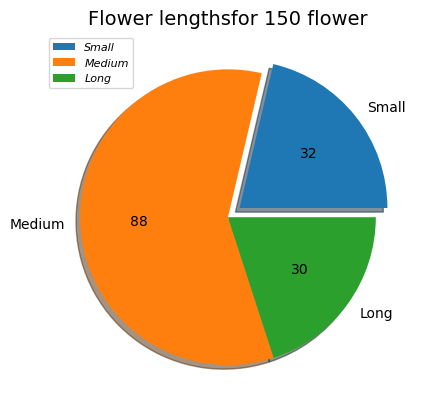

In [32]:
label_list = iris_1_tab.index.values.tolist()
values = iris_1_tab["All_Flower"]
explode_dist = (0.10,0,0)

ax = iris_1_tab.plot.pie(y="All_Flower", autopct = lambda x: '{:.0f}'.format(x*values.sum()/100),shadow = True, labels = label_list,explode = explode_dist)
ax.set_title("Flower lengthsfor 150 flower",fontsize = 14)
ax.set_ylabel("")
ax.legend(prop=fp)
plt.show()

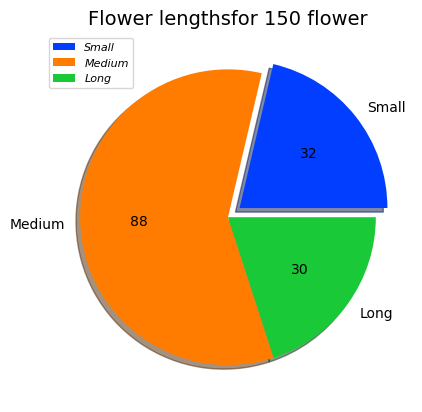

In [34]:
sns_colors = sns.color_palette("bright")[0:3]
ax = iris_1_tab.plot.pie(y="All_Flower",colors = sns_colors, autopct = lambda x: '{:.0f}'.format(x*values.sum()/100),shadow = True, labels = label_list,explode = explode_dist)
ax.set_title("Flower lengthsfor 150 flower",fontsize = 14)
ax.set_ylabel("")
ax.legend(prop=fp)
plt.show()